# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


#### Basic Analysis

In [ ]:
df_train.info()

In [ ]:
df_train.head()

In [ ]:
df_train.tail()

In [ ]:
print(df_train.columns)

In [ ]:
# Check for missing values
missing_values = df_train.isna().sum()
print(missing_values)

#### Univariate Analysis: Non-graphical

In [ ]:
df_train.describe()

In [ ]:
df_train.mode()

In [ ]:
df_train.skew()

In [ ]:
df_train.kurtosis()

#### Multivariate Analysis: Non-graphical

In [ ]:
df_train.corr()

#### Univariate Analysis: Graphical

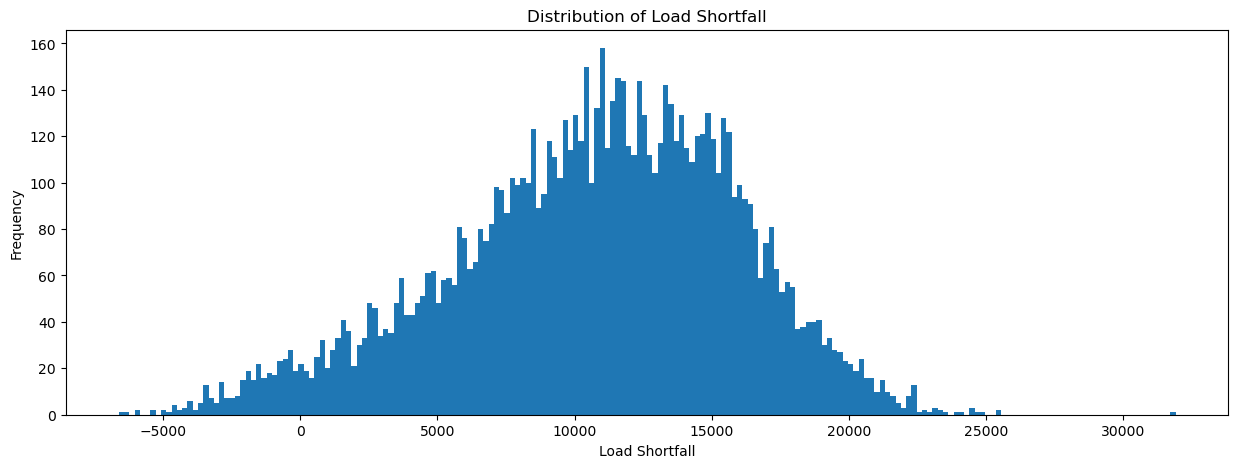

In [33]:
_ = df_train['load_shortfall_3h'].plot.hist(figsize=(15, 5), bins=200, title='Distribution of Load Shortfall')
plt.xlabel('Load Shortfall')
plt.ylabel('Frequency')
plt.show()

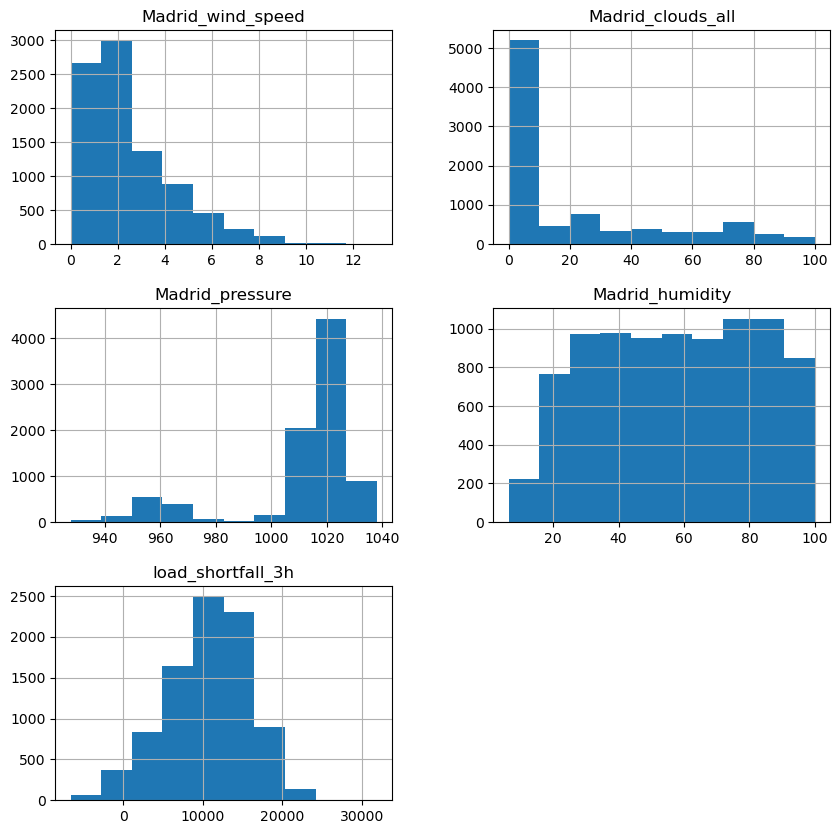

In [28]:
features = ['Madrid_wind_speed', 'Madrid_clouds_all', 'Madrid_pressure', 'Madrid_humidity', 'load_shortfall_3h'] # create a list of numerical features
df_train[features].hist(figsize=(10,10));

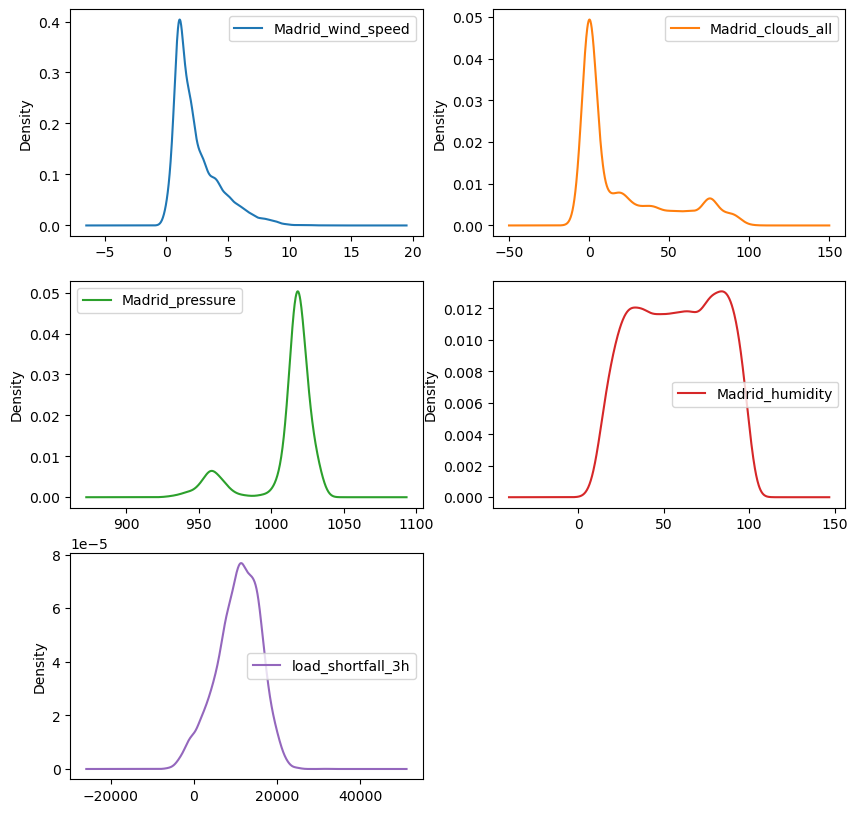

In [29]:
df_train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

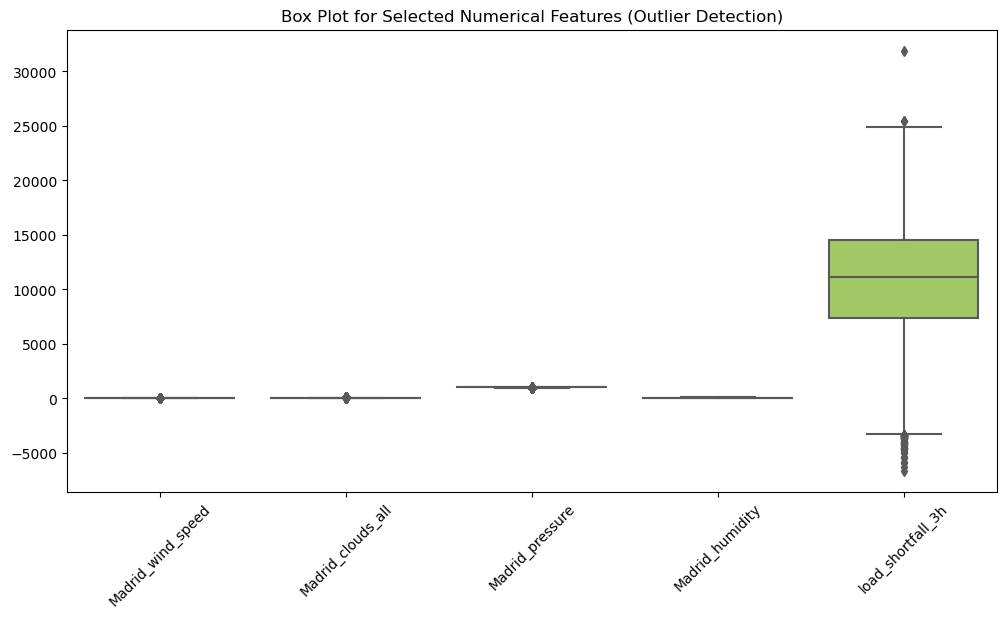

In [31]:
# List of numerical features to check for outliers
features = ['Madrid_wind_speed', 'Madrid_clouds_all', 'Madrid_pressure', 'Madrid_humidity', 'load_shortfall_3h']

# Create box plots for the selected features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[features], palette="Set2")
plt.title("Box Plot for Selected Numerical Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

#### Multivariate Analysis: Graphical

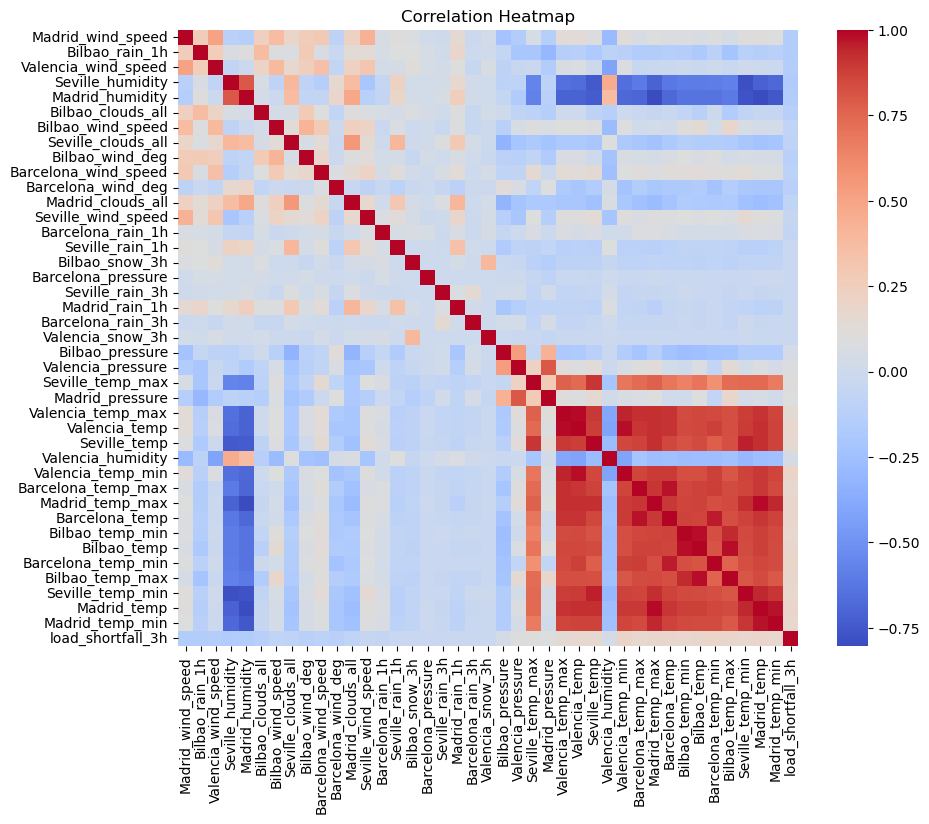

In [32]:
# evaluate correlation
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include='number').columns

# Compute the correlation matrix
corr_matrix = df_train[numeric_columns].corr()

# Plot a correlation heatmap without annotated values
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Basic data cleaning

We will begin our data cleaning by dropping redudent features that do not bring significant value to the prediction. These are the index column 'Unnamed: 0', Madrid_weather_id, Barcelona_weather_id,Seville_weather_id and Bilbao_weather_id.

We will then create copies of both the df_train and df_test to preserve our original data

In [3]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id']
df_train = df_train.drop(columns=columns_to_drop)

# Create a copy of the modified dataframe
df_train_copy = df_train.copy(deep=True)

In [4]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id']
df_test = df_test.drop(columns=columns_to_drop)

# Create a copy of the modified dataframe
df_test_copy = df_test.copy(deep=True)

The next step is to handle the null values.

In [5]:
# Check for null values in df_train
null_train = df_train_copy.isnull().sum()

# Check for null values in df_test
null_test = df_test_copy.isnull().sum()

# Display the count of null values for each column in df_train_copy
print("Null values in df_train:")
print(null_train)

# Display the count of null values for each column in df_test_copy
print("\nNull values in df_test:")
print(null_test)

Null values in df_train:
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Bilbao_pressure            0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_min          0
Barcelona_temp_max

In [6]:
valencia_pressure_stats = df_train_copy['Valencia_pressure'].describe()
print(valencia_pressure_stats)

stats_valencia_pressure = df_test_copy['Valencia_pressure'].describe()
print(stats_valencia_pressure)

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64
count    2466.000000
mean     1013.148351
std         6.528997
min       973.000000
25%      1010.666667
50%      1014.666667
75%      1017.666667
max      1021.666667
Name: Valencia_pressure, dtype: float64


In [7]:
# Finding the mode
valencia_pressure_mode = df_train_copy['Valencia_pressure'].mode()
print(valencia_pressure_mode)

mode_valencia_pressure = df_test_copy['Valencia_pressure'].mode()
print(mode_valencia_pressure)

0    1018.0
Name: Valencia_pressure, dtype: float64
0    1016.0
Name: Valencia_pressure, dtype: float64


In [8]:
# Finding the mode
valencia_pressure_median = df_train_copy['Valencia_pressure'].median()
print(valencia_pressure_median)

median_valencia_pressure = df_test_copy['Valencia_pressure'].median()
print(median_valencia_pressure)

1015.0
1014.6666666667


In handling null values for the 'Valencia_pressure' feature in both df_train and df_test, we performed the following steps:

- We identified that the 'Valencia_pressure' feature had a negatively skewed distribution.

- To address the missing values,filled them with the median of the respective copied datasets (df_train_copy and df_test_copy) using the fillna method. This approach is chosen because the median is less sensitive to outliers and is a suitable imputation method for negatively skewed data.

- We ensured that the changes were applied in-place to the copies, directly modifying the copied DataFrames while keeping the original df_train and df_test DataFrames intact. This helps in preserving the data integrity and ensuring that the changes are reflected in the copied DataFrames.

In [9]:
df_train_copy['Valencia_pressure'].fillna(df_train_copy['Valencia_pressure'].median(), inplace=True)

In [10]:
df_test_copy['Valencia_pressure'].fillna(df_test_copy['Valencia_pressure'].median(), inplace=True)

Next we will be correcting data types

In [11]:
df_train_copy.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Bilbao_pressure         float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia_temp           float64
Seville_temp            float64
Valencia

In [12]:
df_test_copy.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h            int64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h          int64
Bilbao_pressure         float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia_temp           float64
Seville_temp            float64
Valencia

We found that most of the columns are of the correct data type float64, and only a few are of data type object.

Here are the columns with data type object:


- Valencia_wind_deg, Seville_pressure: These columns represent wind degrees and pressure.
- time: This column contains timestamps.

In [13]:
df_train_copy['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [14]:
import re

# Extract numeric part from 'Valencia_wind_deg'
df_train_copy['Valencia_wind_deg'] = df_train_copy['Valencia_wind_deg'].apply(lambda x: re.findall(r'\d+', str(x)))
df_train_copy['Valencia_wind_deg'] = df_train_copy['Valencia_wind_deg'].apply(lambda x: int(x[0]) if len(x) > 0 else 0)

In [15]:
# We do the same for the df_test_copy
# Extract numeric part from 'Valencia_wind_deg'
df_test_copy['Valencia_wind_deg'] = df_test_copy['Valencia_wind_deg'].apply(lambda x: re.findall(r'\d+', str(x)))
df_test_copy['Valencia_wind_deg'] = df_test_copy['Valencia_wind_deg'].apply(lambda x: int(x[0]) if len(x) > 0 else 0)

#### Creating new features

To handle the 'time' column we will convert it into a suitable datetime data type

In [16]:
df_train_copy['time'] = pd.to_datetime(df_train_copy['time'])

In [17]:
df_test_copy['time'] = pd.to_datetime(df_test_copy['time'])

In [18]:
df_train_copy['time']

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

After converting 'time' to a datetime data type, we used the .dt accessor to extract various date and time components. Here are the components we extracted:

- Year, Start Week of Year, Month, Day, Weekday, Start Hour, Start Minute, Start Second
- We also mapped months to seasons by creating a function that assigns each month to a season.

In [19]:
date_column = 'time'

# Extracting date-related features
for df in [df_train_copy, df_test_copy]:
    df['Year'] = df[date_column].dt.year
    df['Start_week_of_year'] = df[date_column].dt.strftime('%U').astype(int)
    df['Month'] = df[date_column].dt.month
    df['Day'] = df[date_column].dt.day
    df['Weekday'] = df[date_column].dt.weekday  # Monday: 0, Sunday: 6
    df['Start_Hour'] = df[date_column].dt.hour

    # Creating a function to map months to seasons
    def get_season(month):
        if 3 <= month <= 5:
            return 'Spring'
        elif 6 <= month <= 8:
            return 'Summer'
        elif 9 <= month <= 11:
            return 'Fall'
        else:
            return 'Winter'
    
    df['Season'] = df['Month'].apply(get_season)

We'll also add the year/month (Y/M)  feature to both df_train_copy and df_test_copy

In [20]:
# Extract year and month into 'Y/M' column for df_train_copy
df_train_copy['Y/M'] = df_train_copy['time'].dt.strftime('%Y-%m')

# Extract year and month into 'Y/M' column for df_test_copy
df_test_copy['Y/M'] = df_test_copy['time'].dt.strftime('%Y-%m')

Then we drop the 'time' column from the DataFrames

In [21]:
df_train_copy.drop('time', axis=1, inplace=True)
df_test_copy.drop('time', axis=1, inplace=True)

In [22]:
# Sort columns by the 'Y/M' column
df_train_copy = df_train_copy.reindex(columns=['Y/M'] + sorted(df_train_copy.columns.difference(['Y/M'])))

# This code first creates a list of column names with 'Y/M' at the front and then sorts the remaining columns alphabetically.

In [25]:
# Sort columns by the 'Y/M' column
df_test_copy = df_test_copy.reindex(columns=['Y/M'] + sorted(df_test_copy.columns.difference(['Y/M'])))

In [23]:
df_train_copy.head(4)

,Y/M,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,...,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,Weekday,Year,load_shortfall_3h
0,2015-01,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,...,1002.666667,0.0,269.888000,269.888000,269.888000,5,0.666667,3,2015,6715.666667
1,2015-01,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,...,1004.333333,0.0,271.728333,271.728333,271.728333,10,1.666667,3,2015,4171.666667
2,2015-01,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,...,1005.333333,0.0,278.008667,278.008667,278.008667,9,1.000000,3,2015,4274.666667
3,2015-01,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,...,1009.000000,0.0,284.899552,284.899552,284.899552,8,1.000000,3,2015,5075.666667


In [26]:
df_test_copy.tail(4)

,Y/M,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,...,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,Weekday,Year
2916,2018-12,1028.666667,0.0,0.0,286.150000,286.483333,285.816667,293.333333,2.666667,56.666667,...,32.000000,1014.666667,0,290.323333,290.816667,289.816667,8,1.333333,0,2018
2917,2018-12,1027.000000,0.0,0.0,288.820000,289.483333,288.150000,233.333333,2.666667,0.000000,...,23.666667,1014.666667,0,293.483333,293.483333,293.483333,6,3.000000,0,2018
2918,2018-12,1027.000000,0.0,0.0,284.473333,285.816667,283.150000,253.333333,2.333333,0.000000,...,59.000000,1014.666667,0,285.976667,286.483333,285.483333,6,2.000000,0,2018
2919,2018-12,1028.000000,0.0,0.0,281.133333,283.816667,278.483333,310.000000,4.666667,0.000000,...,79.000000,1014.666667,0,280.313333,281.150000,279.483333,10,2.333333,0,2018


### EDA (Cleaned Data)

#### Univariate Analysis: Graphical

In [ ]:
# Distribution of train data target value

# Extract the target variable
target_variable = df_train_copy['load_shortfall_3h']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(target_variable, bins=30, color='skyblue')
plt.title('Distribution of load_shortfall_3h')
plt.xlabel('load_shortfall_3h')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
sns.set_style("whitegrid")

# Create a density plot for seville_wind_speed
plt.figure(figsize=(8, 6))
sns.kdeplot(df_train_copy['Seville_wind_speed'], fill=True, color='blue')
plt.title('Density Plot of Seville Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Density')
plt.show()

#### Time Series Analysis

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic